- Understand the problem
- Recognise the task
- Perform preprocessing, feature engineering and EDA
- Train suitable machine learning models
- Tune and evaluate the performance

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [151]:
data = pd.read_csv('CO2_Emissions_Canada.csv')
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [153]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [154]:
data['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [155]:
data['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [156]:
data.Cylinders.unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16], dtype=int64)

In [157]:
data.Transmission.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [158]:
# Check for duplicates
data.duplicated().sum()

1103

In [159]:
# Drop the duplicates
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [160]:
# Check for missing values
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

# ===================================================

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

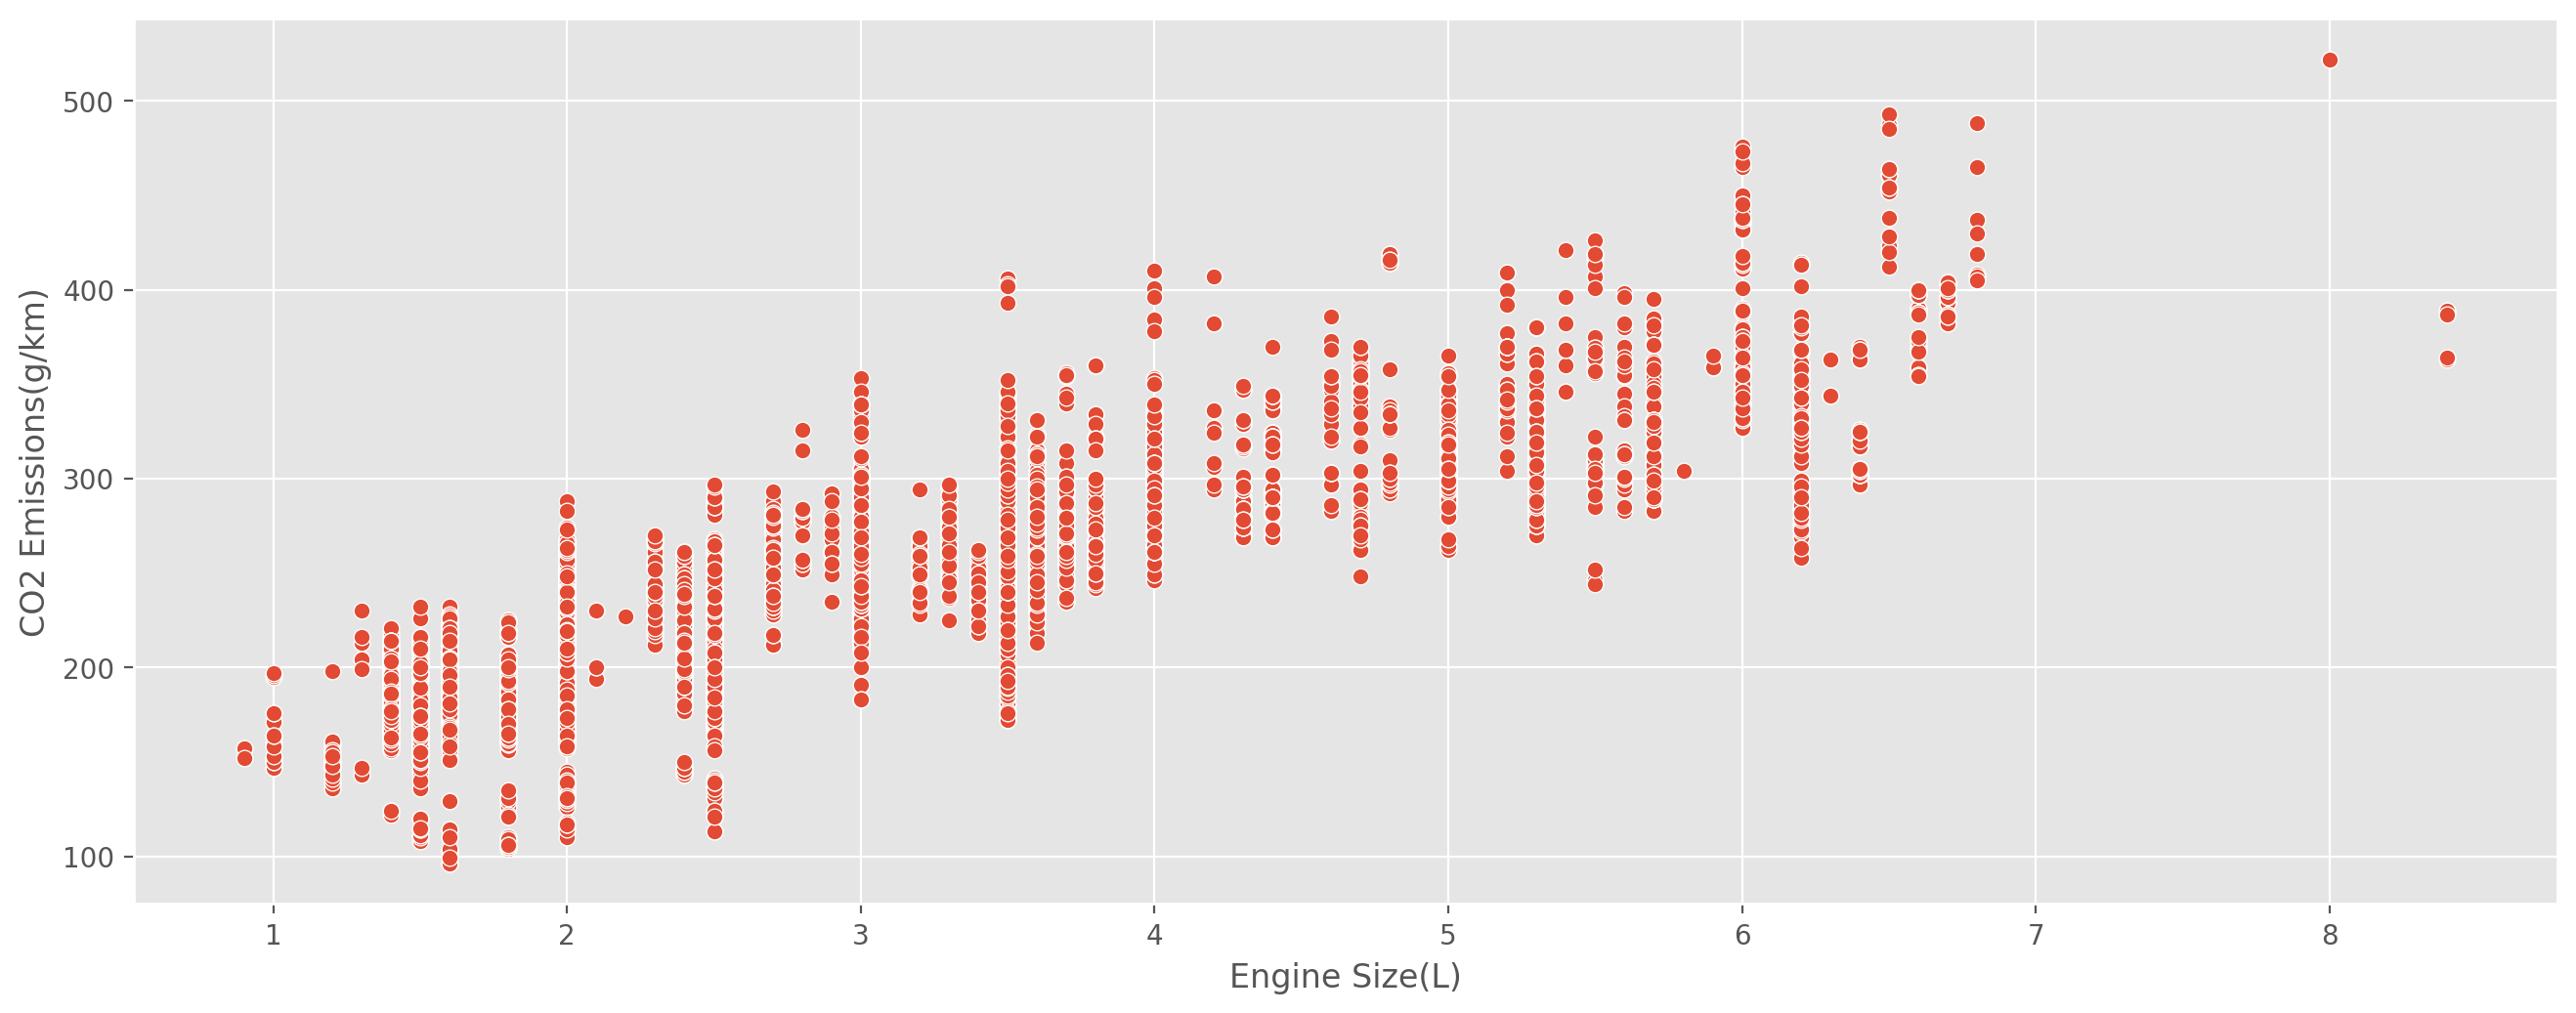

In [161]:
# Engine size and emission
plt.figure(figsize = (16,6), dpi = 200)
sns.scatterplot('Engine Size(L)', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

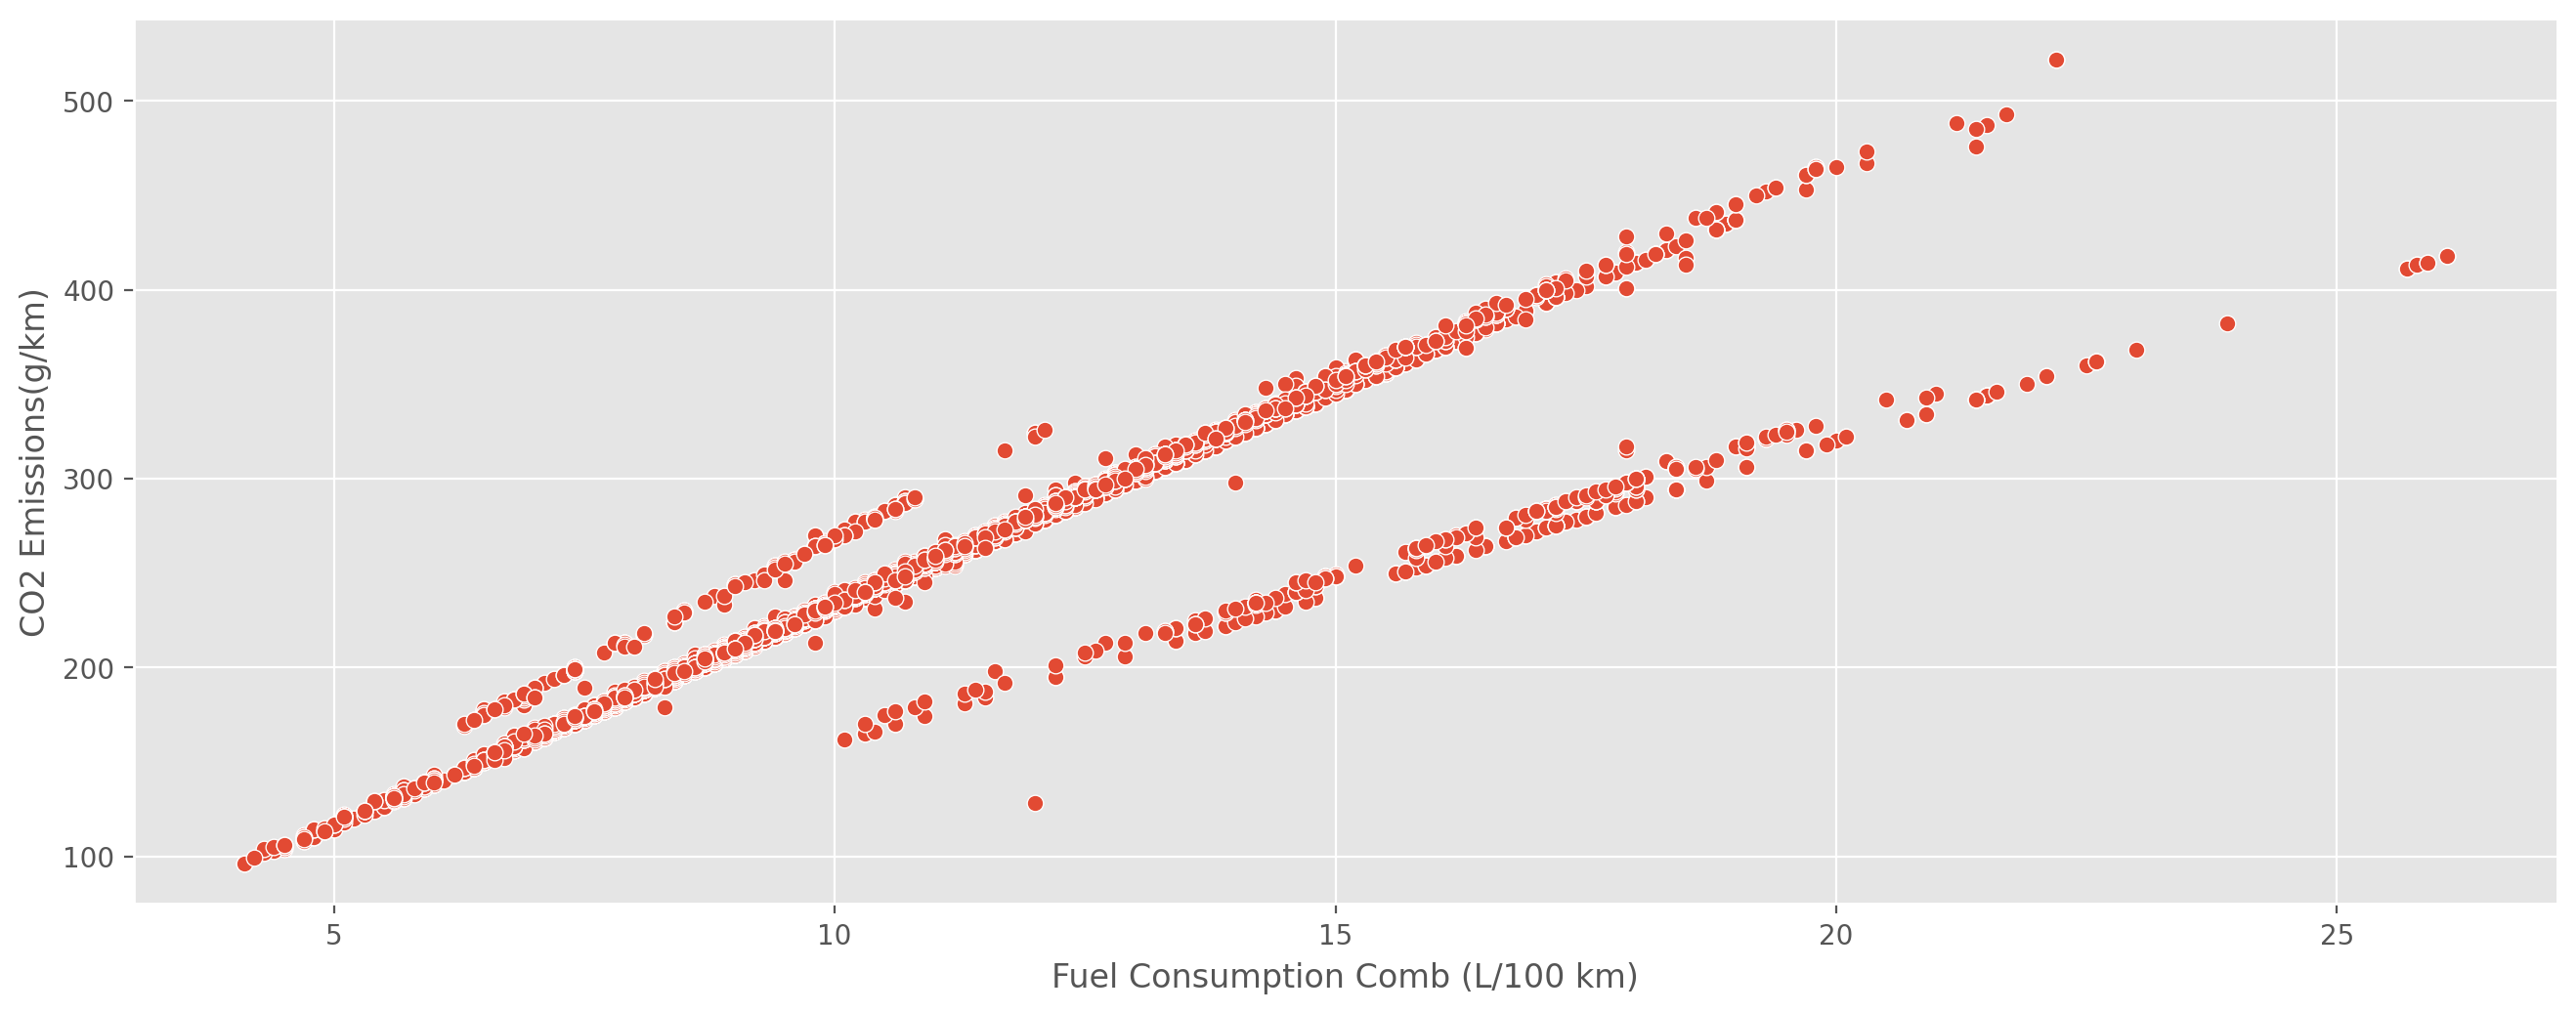

In [162]:
# Fuel consumption and emission
plt.figure(figsize = (16,6), dpi = 200)
sns.scatterplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

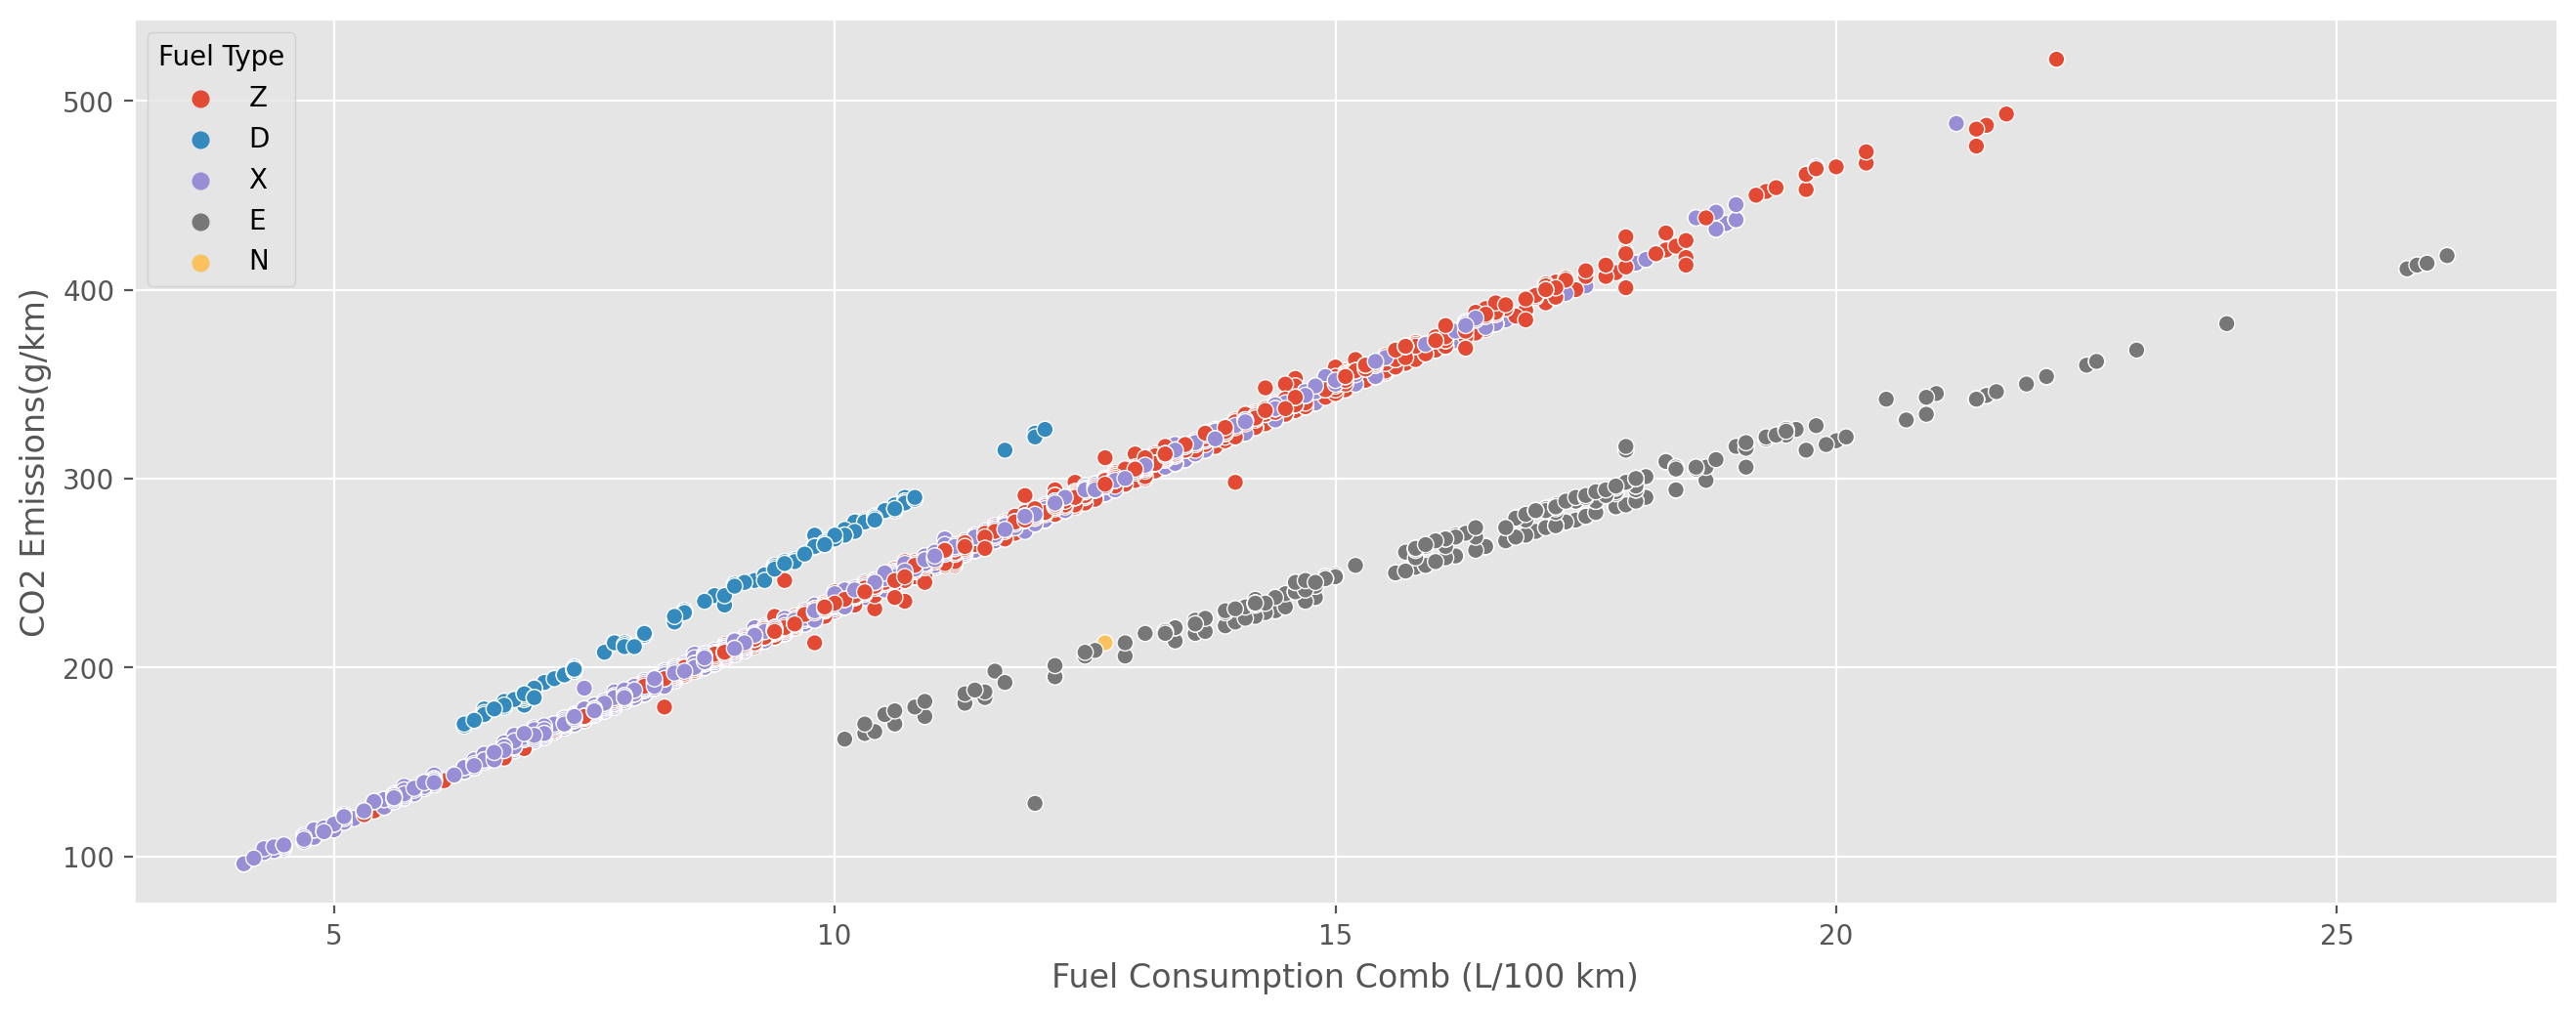

In [163]:
# Fuel consumption and emission wrt Fuel types
plt.figure(figsize = (16,6), dpi = 200)
sns.scatterplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', hue = 'Fuel Type', data = data)

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

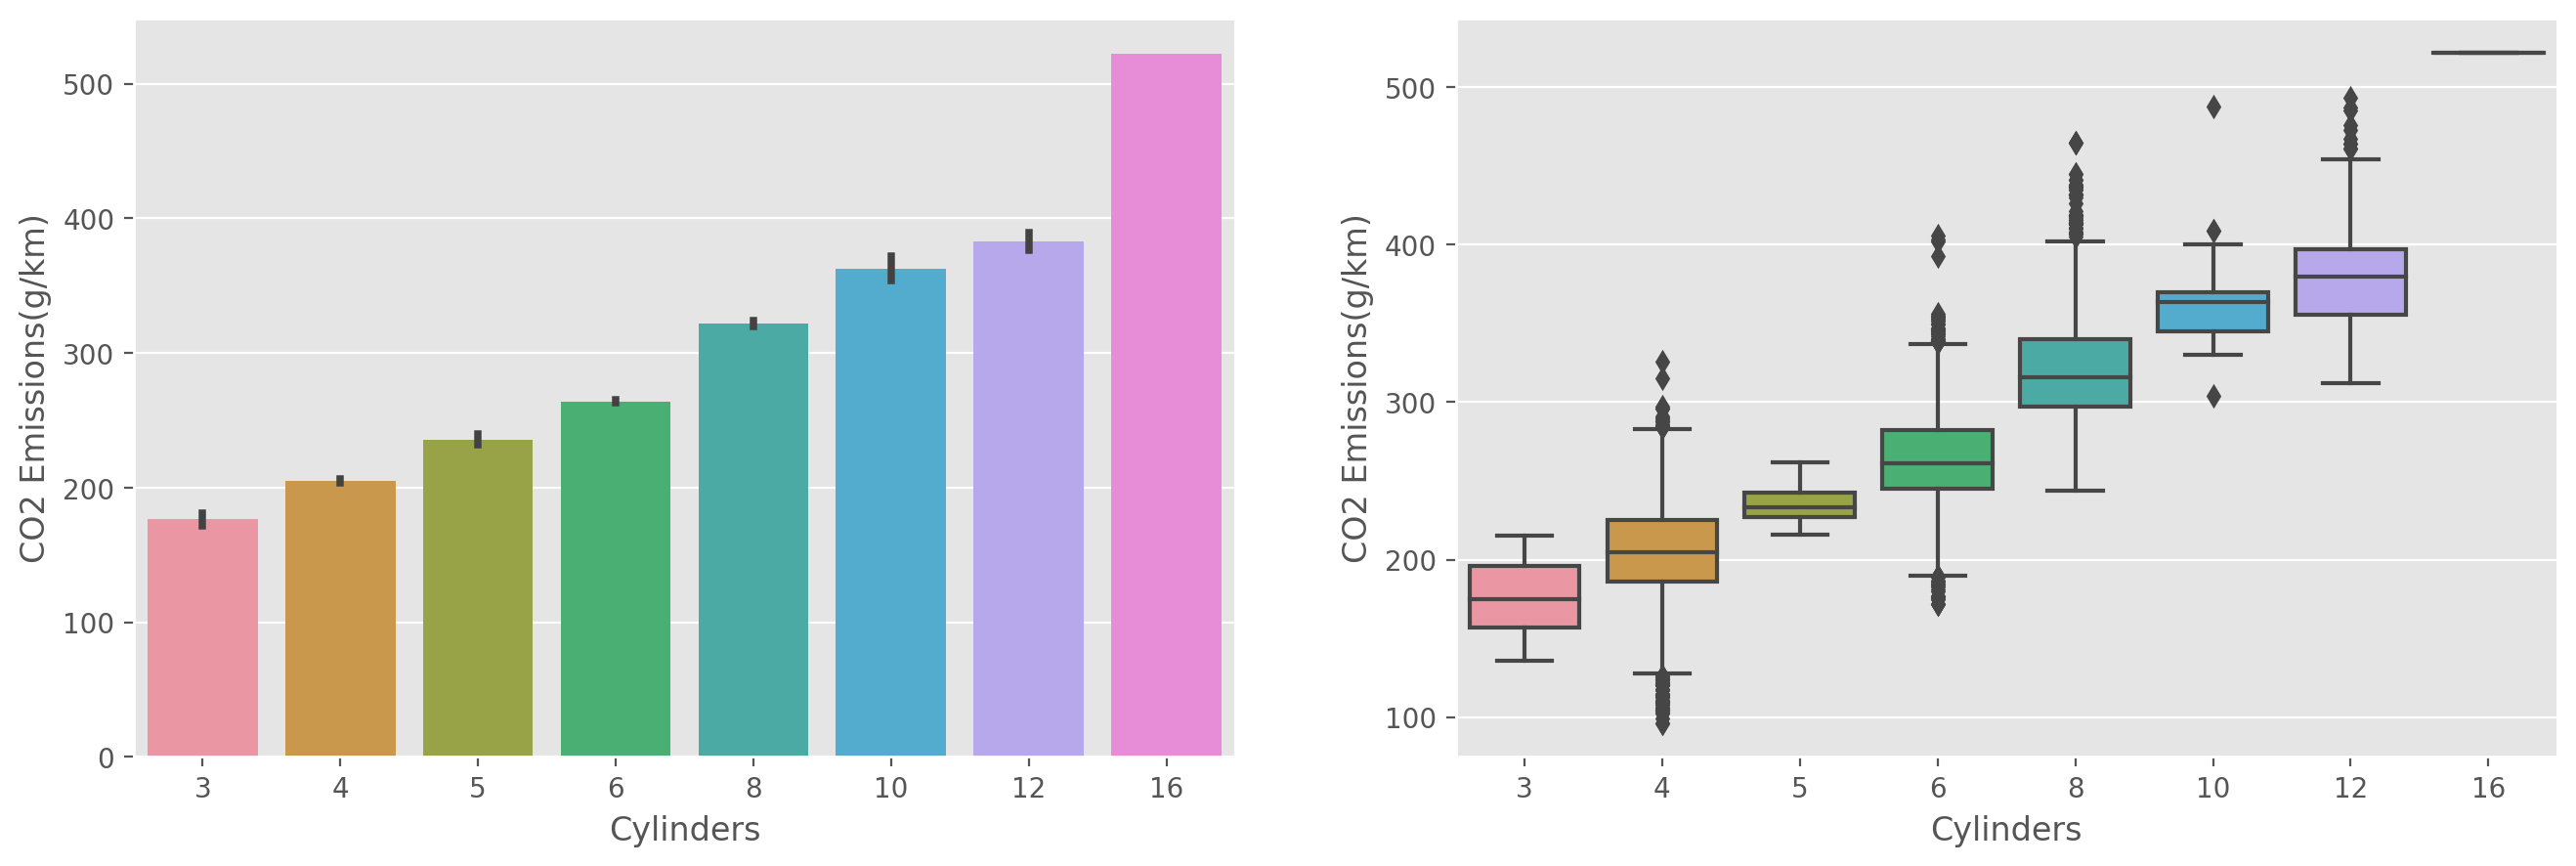

In [164]:
# Cylinders and emission
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Cylinders', 'CO2 Emissions(g/km)', data = data)
plt.subplot(1,2,2)
sns.boxplot('Cylinders', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

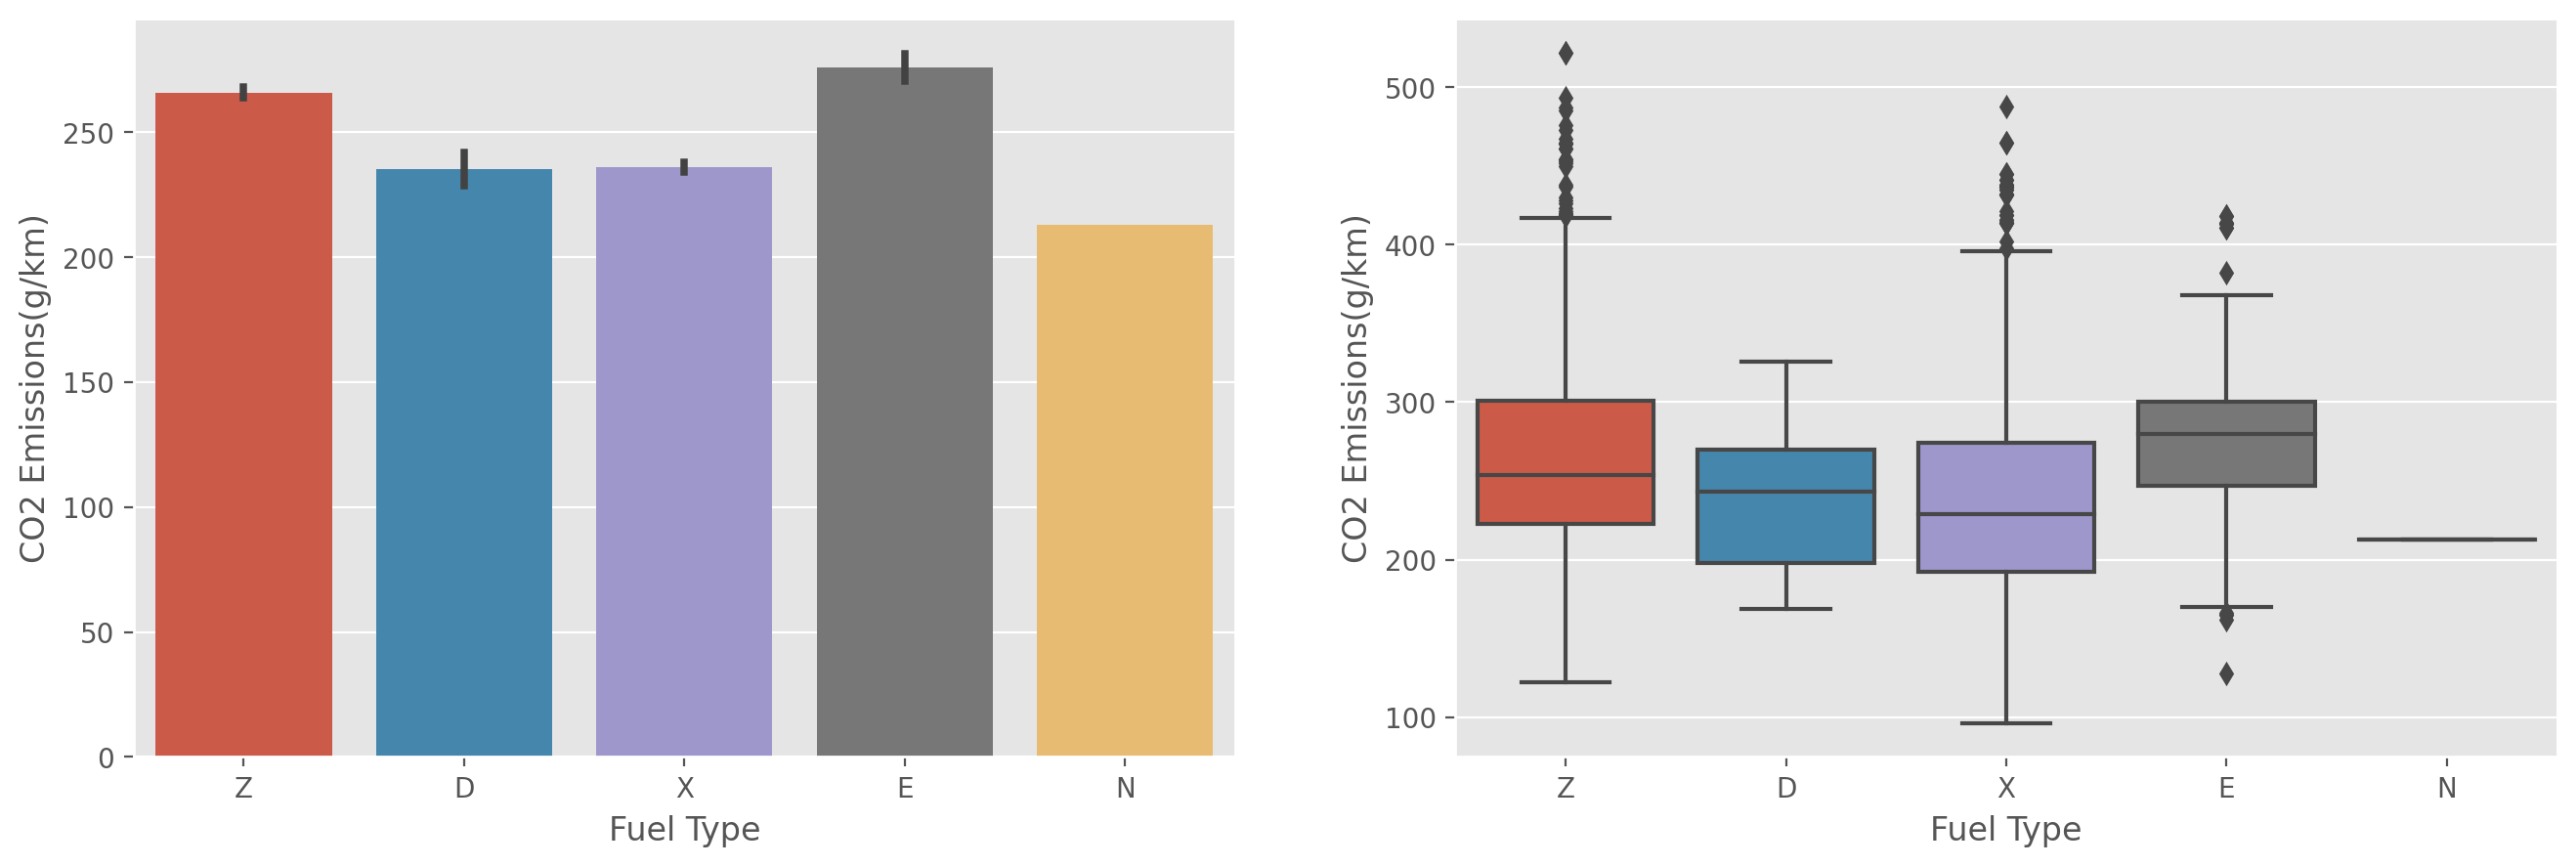

In [165]:
# Fuel type and emissions
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Fuel Type', 'CO2 Emissions(g/km)', data = data)
plt.subplot(1,2,2)
sns.boxplot('Fuel Type', 'CO2 Emissions(g/km)', data = data)

In [166]:
data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

Fuel Type
D    235.238095
E    276.048485
N    213.000000
X    235.977953
Z    265.731284
Name: CO2 Emissions(g/km), dtype: float64

In [167]:
# Transmission types in descending order of average emission
desc_order = data.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
desc_order

Index(['A7', 'A10', 'A5', 'A4', 'A8', 'AS10', 'A6', 'AS7', 'AS5', 'AM7', 'AS8',
       'M7', 'AM9', 'AM8', 'A9', 'AS9', 'AS6', 'M6', 'AS4', 'AV8', 'M5', 'AV7',
       'AV6', 'AM6', 'AV10', 'AV', 'AM5'],
      dtype='object', name='Transmission')

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

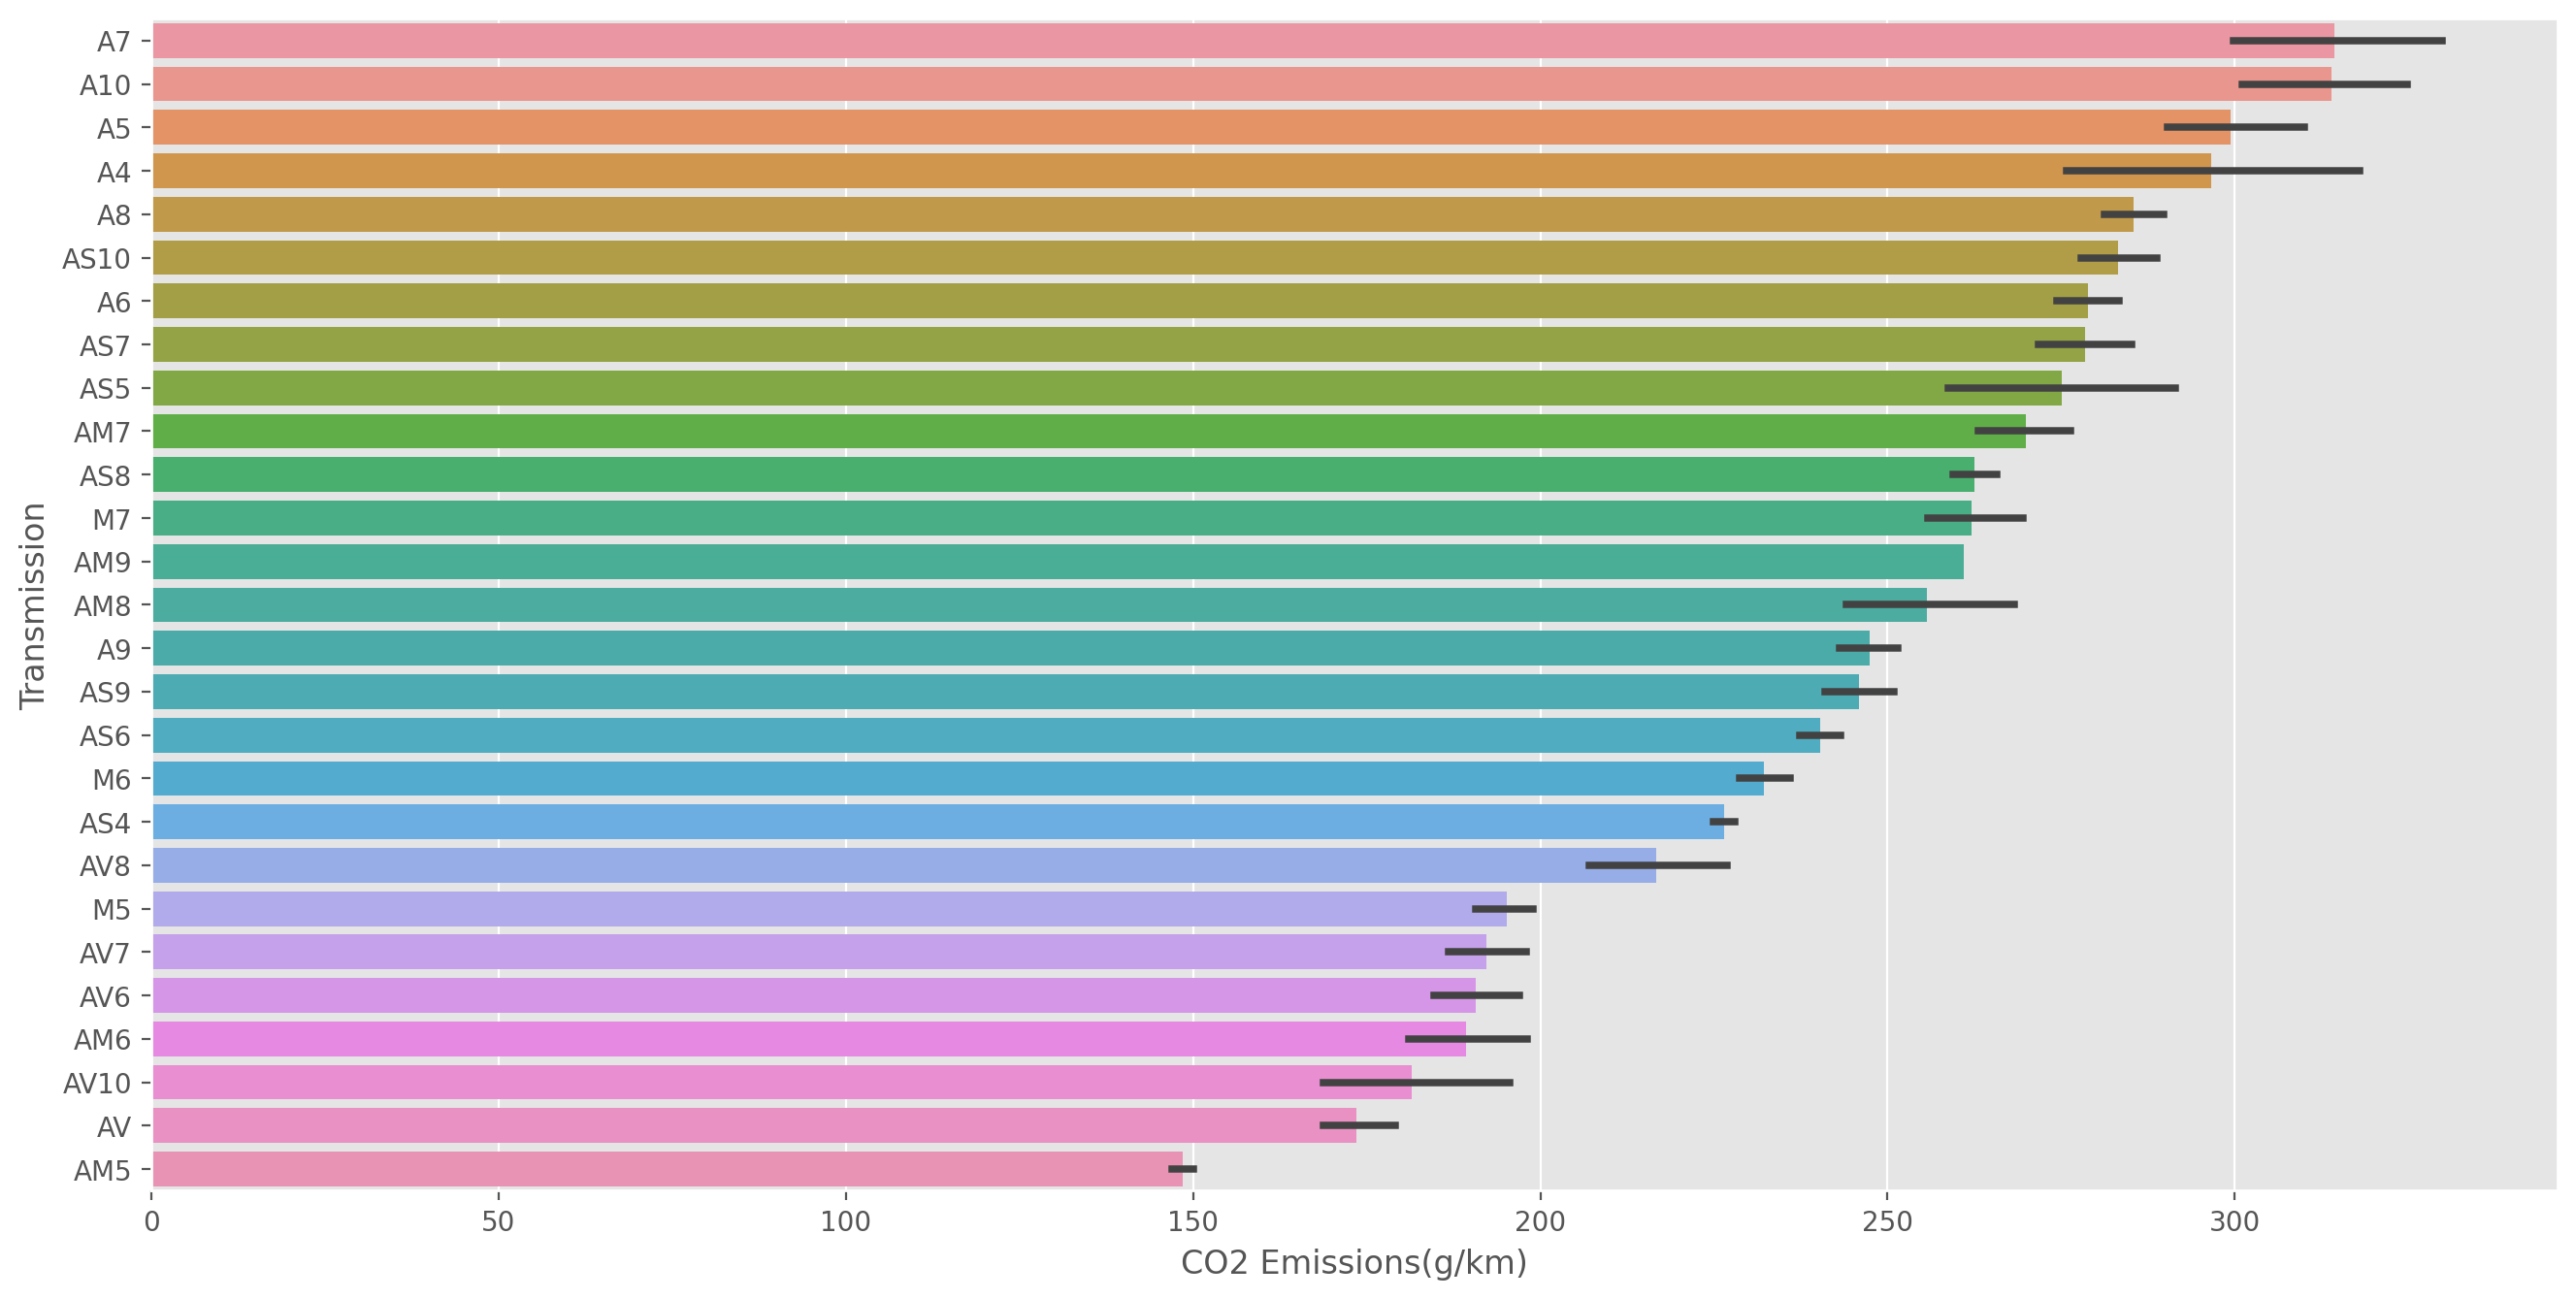

In [168]:
# Transmission and Corbon emission
plt.figure(figsize = (16,8), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Transmission', data = data, order = desc_order)

<AxesSubplot:>

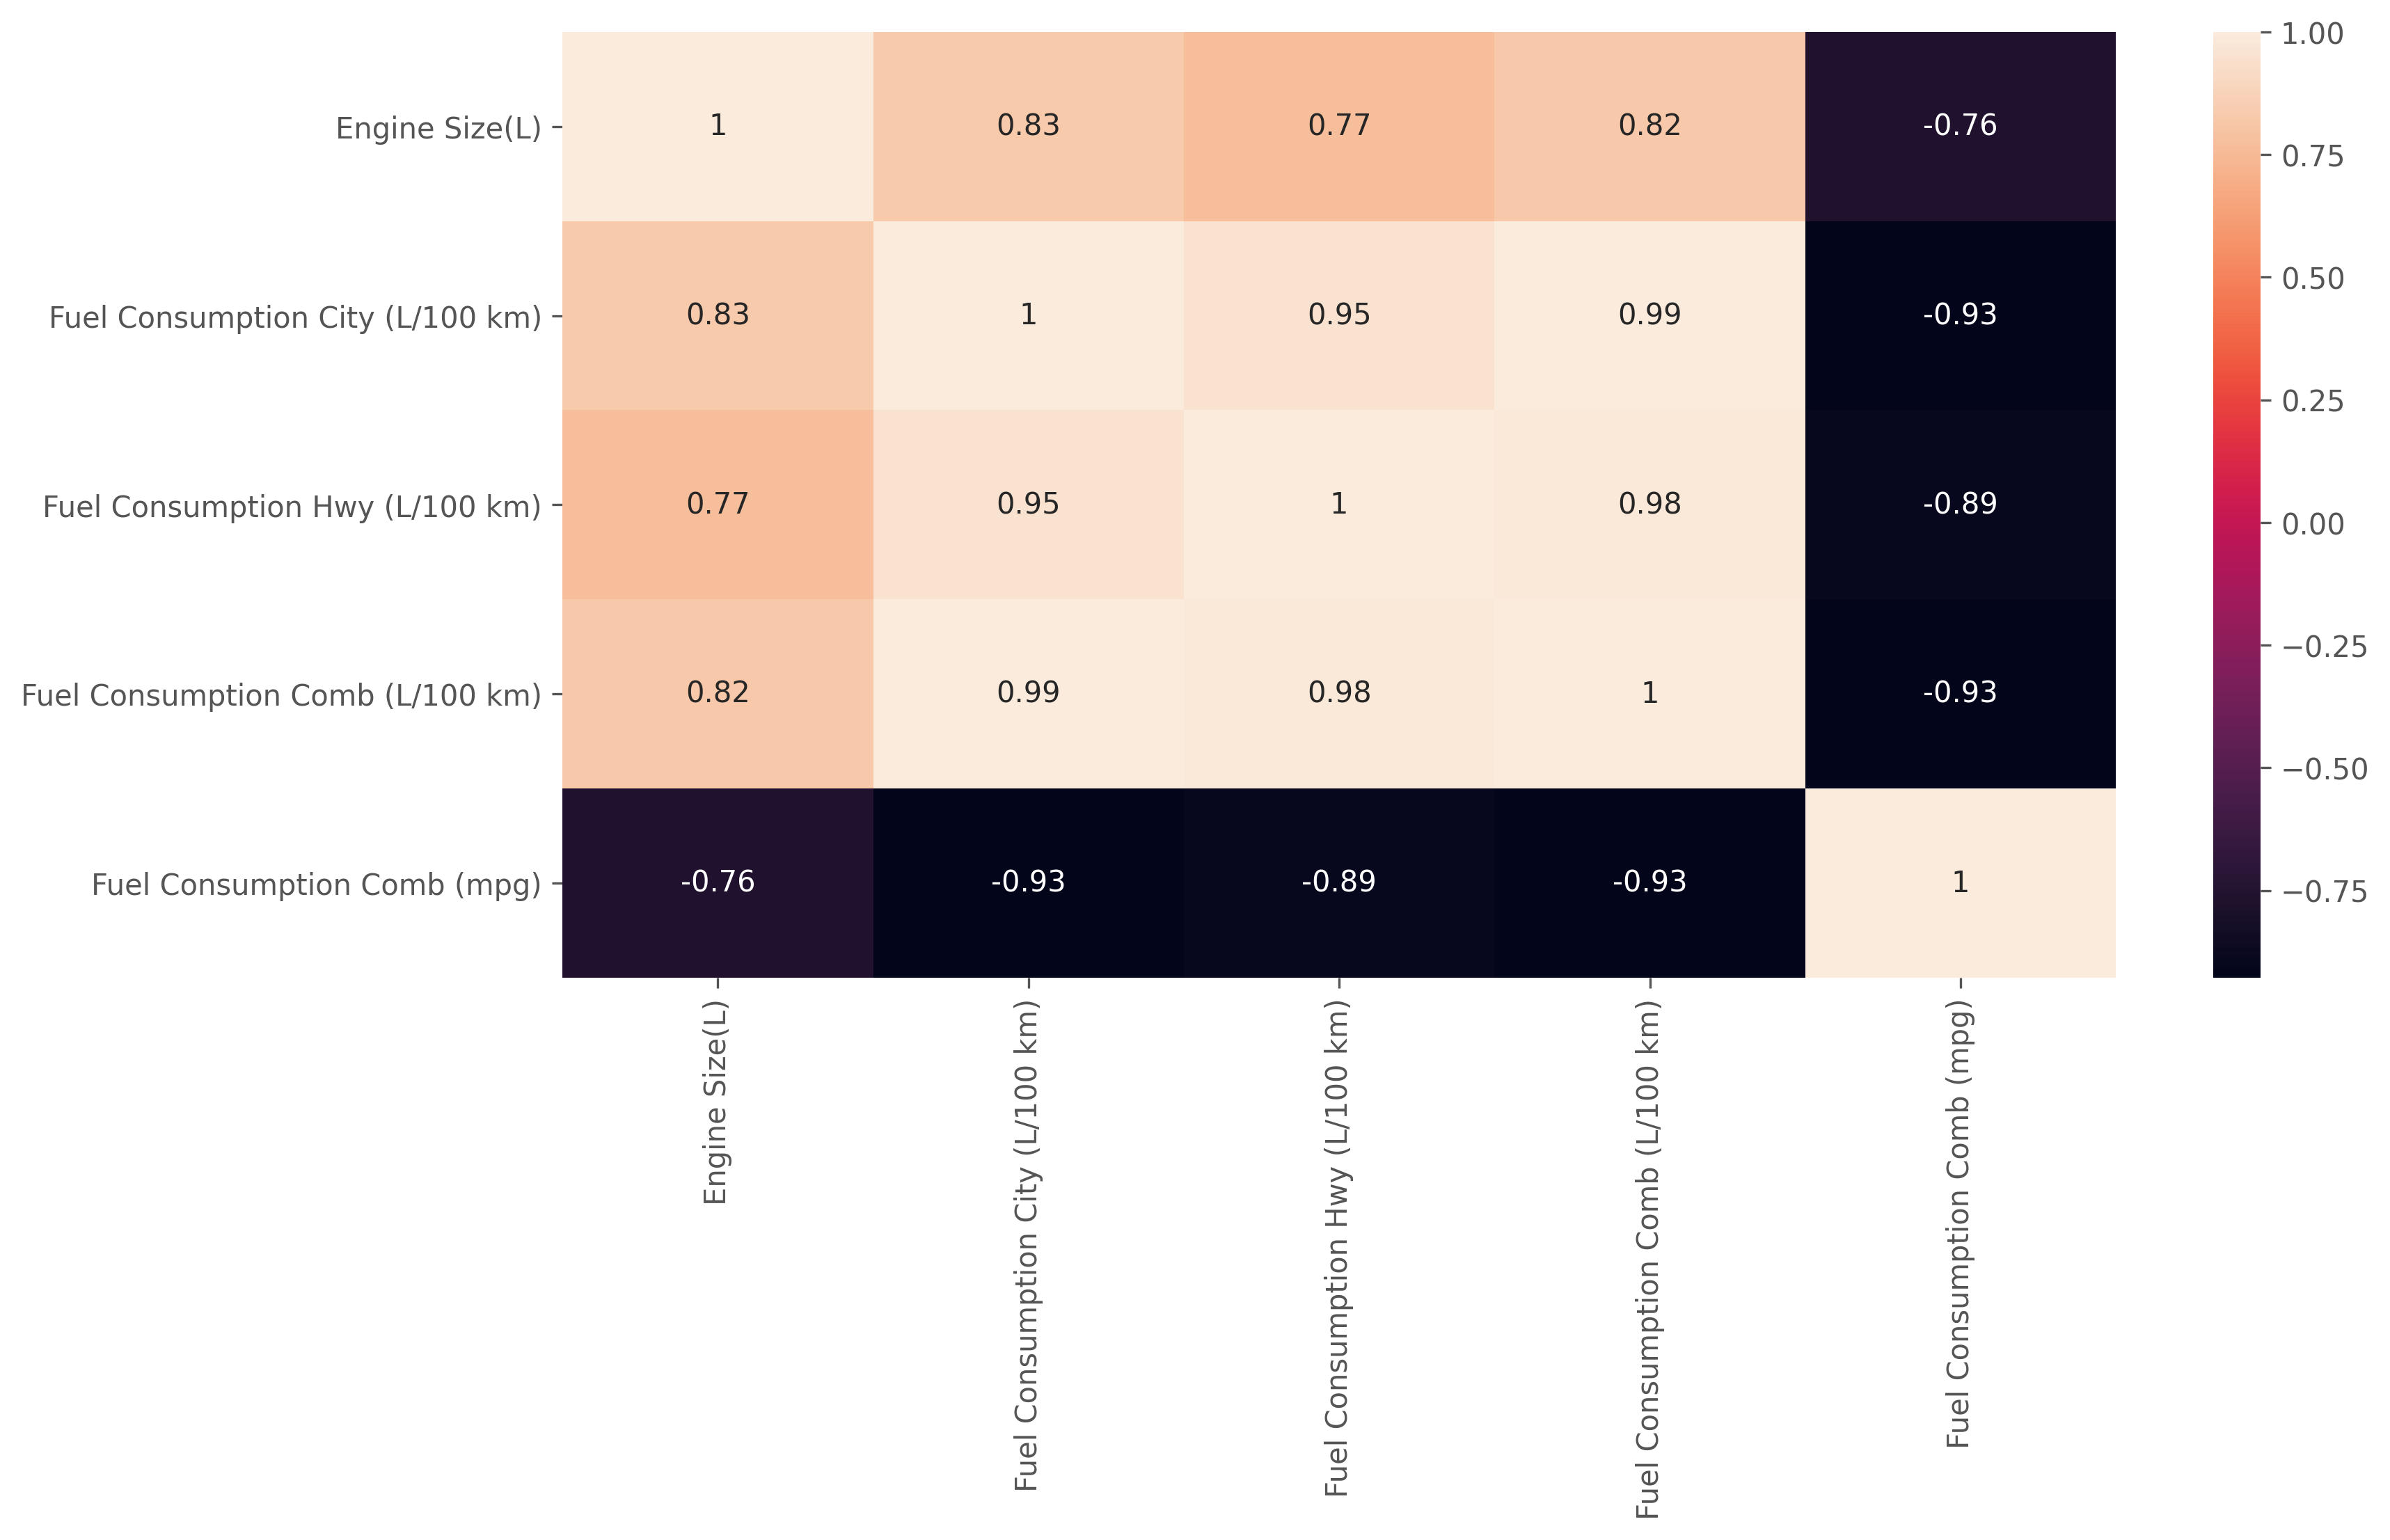

In [169]:
# Correlation analysis
cols = ['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']
plt.figure(figsize = (12,6), dpi = 300)
sns.heatmap(data[cols].corr(), annot = True)

# ===================================================

In [170]:
cols = ['Vehicle Class', 'Fuel Type', 'Transmission', 'Cylinders', 'Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']
X = data[cols]
Y = data[['CO2 Emissions(g/km)']]

In [171]:
# Independent Feature Set
X.head(10)

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,COMPACT,Z,AS5,4,2.0,8.5
1,COMPACT,Z,M6,4,2.4,9.6
2,COMPACT,Z,AV7,4,1.5,5.9
3,SUV - SMALL,Z,AS6,6,3.5,11.1
4,SUV - SMALL,Z,AS6,6,3.5,10.6
5,MID-SIZE,Z,AS6,6,3.5,10.0
6,MID-SIZE,Z,AS6,6,3.5,10.1
7,MID-SIZE,Z,AS6,6,3.7,11.1
8,MID-SIZE,Z,M6,6,3.7,11.6
9,COMPACT,Z,AS5,4,2.4,9.2


In [172]:
# Dependent Feature
Y.head(10)

,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244
5,230
6,232
7,255
8,267
9,212


In [173]:
print('Independent Feature set shape : ', X.shape)
print('Dependent Feature shape       : ', Y.shape)

Independent Feature set shape :  (6282, 6)
Dependent Feature shape       :  (6282, 1)


In [187]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [188]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape )

Training data shape   :  (5025, 6)
Training labels shape :  (5025, 1)
Testing data shape    :  (1257, 6)
Testing labels shape  :  (1257, 1)


In [189]:
# Scaling 
cols = ['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fitting on the training set
scaler.fit(x_train[cols])
# Transforming the training and testing
x_train[cols] = scaler.transform(x_train[cols])
x_test[cols]  = scaler.transform(x_test[cols])

In [190]:
# Encoding
cols = ['Vehicle Class', 'Fuel Type', 'Transmission']
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# Fit transform on train set
x_train[cols] = encoder.fit_transform(x_train[cols])
# Transform on test set
x_test[cols] = encoder.transform(x_test[cols])

In [193]:
x_train.head()

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
3933,9.0,3.0,8.0,4,0.093333,0.031818
1707,2.0,3.0,25.0,4,0.146667,0.200000
4464,2.0,4.0,17.0,6,0.280000,0.268182
333,3.0,3.0,24.0,4,0.066667,0.168182
5890,0.0,3.0,22.0,4,0.146667,0.154545


In [194]:
x_test.head()

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
4518,2.0,3.0,18.0,6,0.360000,0.254545
6233,9.0,4.0,17.0,3,0.080000,0.231818
3489,10.0,3.0,25.0,6,0.360000,0.345455
1348,0.0,3.0,24.0,4,0.120000,0.177273
6180,0.0,4.0,6.0,8,0.413333,0.436364


In [195]:
# Training a machine learning model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [196]:
# Evaluating the model
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.9015188367787916
Testing Set Score  :  0.9094189937295191


In [197]:
# Training a K nearest Neighbours Model
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 3)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [198]:
# Evaluating the model
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.9909924620453243
Testing Set Score  :  0.9816068579301755


In [199]:
x_test[0:5]

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
4518,2.0,3.0,18.0,6,0.360000,0.254545
6233,9.0,4.0,17.0,3,0.080000,0.231818
3489,10.0,3.0,25.0,6,0.360000,0.345455
1348,0.0,3.0,24.0,4,0.120000,0.177273
6180,0.0,4.0,6.0,8,0.413333,0.436364


In [200]:
regressor.predict(x_test[0:5])

array([[236.        ],
       [218.        ],
       [276.        ],
       [186.        ],
       [285.66666667]])